In [ ]:
def cost(y,t):
    if y!=t:
        cost_log=-1*t*math.log2(y)-1*(1-t)*math.log2(1-y)
        return cost_log
    else:
        return 0

In [ ]:
def sigmoid(z):
    return 1.0/(1.0 + math.exp(-z)*1.0)

In [ ]:
def GD(lr,w,features,t):
    c=0
    t=t.to_numpy()
    grad=np.zeros((len(w),1))
    correct=0
    for i in range(len(features)):
        diff=0
        ans=0
        ans=ans+np.dot(features[i],w)   
        yi=sigmoid(ans)
        ti=t[i]
        c=c+cost(yi,ti)
        diff=yi-ti
        if yi>=0.5:
            yi=1
        else:
            yi=0
        
        if yi==ti:
            correct=correct+1
        
        for j in range(0,5):
            grad[j]=grad[j]+diff*features[i][j]    
    w=w-lr*grad
    #print(w)
    return correct/len(features),w,c

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
dataset=pd.read_csv("dataset_LR.csv",header=None)

In [ ]:
acc,prec,recall,loss,f=np.zeros((10,1)),np.zeros((10,1)),np.zeros((10,1)),np.zeros((10,1)),np.zeros((10,1))
acct,prect,recallt,losst,ft=np.zeros((10,1)),np.zeros((10,1)),np.zeros((10,1)),np.zeros((10,1)),np.zeros((10,1))
for s in range(1):
    train=dataset.sample(frac=0.7,random_state=100).astype('float') #random state is a seed value
    test=dataset.drop(train.index).iloc[1:].astype('float')

    w=np.zeros((5,1))
    #print(train)
    labels=train[4]
    labels_test=test[4]
       
    
    train=train.to_numpy()
    test=test.to_numpy()
    
    train=np.delete(train, -1, axis=1)
    test=np.delete(test, -1, axis=1)
    
    ones=np.ones((len(train),1))
    train=np.append(train,ones,1)
    
    ones=np.ones((len(test),1))
    test=np.append(test,ones,1)
    

    epochs=1000
    error=np.zeros((epochs,1))
    acc=np.zeros((epochs,1))
    
    for i in range(epochs):
        acc[i],w,error[i]=GD(0.0001,w,train,labels)
        if i%50==0:
            print(i,acc[i])
            
    print(w)           
    import matplotlib.pyplot as plt
    #x = np.linspace(0, 2000, len(error), endpoint=True)
    #plt.plot(x[::50],error[::50])  
    y = np.linspace(0, epochs, len(acc), endpoint=True)
    plt.plot(y[::50],acc[::50]) 
    plt.show()
    labels_test=labels_test.to_numpy()
    labels=labels.to_numpy()
    acc[s],prec[s],recall[s],loss[s],f[s]=stats("Training",labels,train,w)
    acct[s],prect[s],recallt[s],losst[s],ft[s]=stats("Testing",labels_test,test,w)

print("Training Stats\n")
print("Accuracy = ",np.mean(acc))
print("Precision = ",np.mean(prec))
print("Recall = ",np.mean(recall))
print("Loss = ",np.mean(loss))
print("Fscore = ",np.mean(f))

print("Test Stats : \n")
print("Accuracy = ",np.mean(acct))
print("Precision = ",np.mean(prect))
print("Recall = ",np.mean(recallt))
print("Loss = ",np.mean(losst))
print("Fscore = ",np.mean(ft))
    

In [29]:
def stats(name,labels_test,tes,w):
    c=0
    conf_mat=np.zeros((2,2))
    for i in range(len(tes)):
        yi=0
        ti=labels_test[i]
        yi=yi+np.dot(tes[i],w)
        yi=1/(1+math.exp(-yi))
        c=c+cost(yi,ti)
        if yi>=0.5:
            yi=1
        else:    
            yi=0
        conf_mat[(int)(ti)][yi]=conf_mat[(int)(ti)][yi]+1
        #TT TF
        #FT FF
    acc= (conf_mat[0][0]+conf_mat[1][1])/(conf_mat[0][0]+conf_mat[1][1]+conf_mat[0][1]+conf_mat[1][0])
    prec=conf_mat[0][0]/(conf_mat[0][0]+conf_mat[1][0])
    recall=conf_mat[0][0]/(conf_mat[0][0]+conf_mat[0][1])
    loss=c
    f=2*conf_mat[0][0]/(2*conf_mat[0][0]+conf_mat[0][1]+conf_mat[1][0])
    #print("\n\n",name," ","stats\n\n")
    #print("Accuracy = ",(conf_mat[0][0]+conf_mat[1][1])/(conf_mat[0][0]+conf_mat[1][1]+conf_mat[0][1]+conf_mat[1][0]))
    #print("Precision = ",conf_mat[0][0]/(conf_mat[0][0]+conf_mat[1][0]))
    #print("Recall = ",conf_mat[0][0]/(conf_mat[0][0]+conf_mat[0][1]))
    #print("Loss = ",c)
    #print("Fscore = ",2*conf_mat[0][0]/(2*conf_mat[0][0]+conf_mat[0][1]+conf_mat[1][0]))
    return acc,prec,recall,loss,f
    

In [30]:
import random
def SGD(lr,w,features,t):
    c=0
    diff=0
    correct=0
    t=t.to_numpy()
    w_update=np.zeros((len(w),1))
    i=random.randint(0,len(features)-1)
    ans=0
    ans=ans+np.dot(features[i],w)   
    yi=sigmoid(ans)
    ti=t[i]
    c=c+cost(yi,ti) 
    diff=diff+(yi-ti)
    if yi>=0.5:
        yi=1
    else:
        yi=0
    for j in range(0,5):
        w_update[j]=w_update[j]+diff*features[i][j]
    #print("\nCost = ",c,"\n","Diff = ",diff)
    for i in range(0,5):
        w[i]=w[i]-lr*w_update[i]#/len(features)
        
    for k in range(len(features)):
        yi=sigmoid(np.dot(features[k],w)) 
        if yi<0.5 and t[k]==0:
            correct=correct+1
        elif yi>0.5 and t[k]==1:
            correct=correct+1
    return correct/len(features),w,c

0 [0.85744017]
50 [0.84391259]
100 [0.85223725]
150 [0.85952133]
200 [0.83662851]
250 [0.86056191]
300 [0.85119667]
350 [0.88449532]
400 [0.89906348]
450 [0.88969823]
500 [0.88345473]
550 [0.88657648]
600 [0.89386056]
650 [0.89698231]
700 [0.91467222]
750 [0.91155047]
800 [0.92091571]
850 [0.91883455]
900 [0.92091571]
950 [0.91987513]
1000 [0.93028096]
1050 [0.93132154]
1100 [0.93860562]
1150 [0.93652445]
1200 [0.93652445]
1250 [0.94172737]
1300 [0.94693028]
1350 [0.94172737]
1400 [0.9396462]
1450 [0.94068678]
1500 [0.94380853]
1550 [0.95005203]
1600 [0.95317378]
1650 [0.94797086]
1700 [0.95317378]
1750 [0.95733611]
1800 [0.94797086]
1850 [0.95213319]
1900 [0.95837669]
1950 [0.95733611]
[[-0.68116275]
 [-0.31416352]
 [-0.29760202]
 [-0.1337225 ]
 [ 0.0901661 ]]


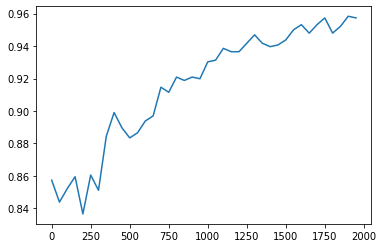

0 [0.40166493]
50 [0.83246618]
100 [0.78043704]
150 [0.85848075]
200 [0.84287201]
250 [0.86368366]
300 [0.88033299]
350 [0.86888658]
400 [0.89386056]
450 [0.90842872]
500 [0.93028096]
550 [0.93756504]
600 [0.93340271]
650 [0.92715921]
700 [0.93028096]
750 [0.92299688]
800 [0.92819979]
850 [0.92611863]
900 [0.92299688]
950 [0.92091571]
1000 [0.93132154]
1050 [0.93756504]
1100 [0.94068678]
1150 [0.93860562]
1200 [0.94068678]
1250 [0.94172737]
1300 [0.94068678]
1350 [0.94068678]
1400 [0.94276795]
1450 [0.94276795]
1500 [0.94276795]
1550 [0.94276795]
1600 [0.94276795]
1650 [0.94276795]
1700 [0.94276795]
1750 [0.94276795]
1800 [0.9396462]
1850 [0.9396462]
1900 [0.94276795]
1950 [0.9458897]
[[-0.68493361]
 [-0.32100729]
 [-0.27490299]
 [-0.15888584]
 [ 0.09171516]]


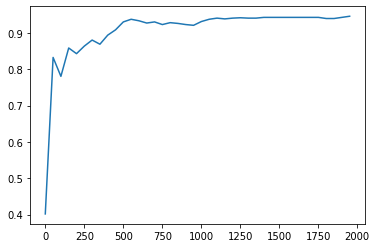

0 [0.54526535]
50 [0.81893861]
100 [0.84391259]
150 [0.85639958]
200 [0.86680541]
250 [0.87096774]
300 [0.86888658]
350 [0.88241415]
400 [0.89386056]
450 [0.88449532]
500 [0.89802289]
550 [0.89490114]
600 [0.9157128]
650 [0.91363163]
700 [0.92299688]
750 [0.93028096]
800 [0.93236212]
850 [0.93236212]
900 [0.93548387]
950 [0.92715921]
1000 [0.92299688]
1050 [0.93236212]
1100 [0.93340271]
1150 [0.93444329]
1200 [0.93548387]
1250 [0.93236212]
1300 [0.93028096]
1350 [0.93340271]
1400 [0.93236212]
1450 [0.93860562]
1500 [0.93860562]
1550 [0.93860562]
1600 [0.93860562]
1650 [0.94901145]
1700 [0.94484912]
1750 [0.94172737]
1800 [0.95317378]
1850 [0.9458897]
1900 [0.9458897]
1950 [0.94172737]
[[-0.69088823]
 [-0.32519755]
 [-0.28346382]
 [-0.13282051]
 [ 0.0801129 ]]


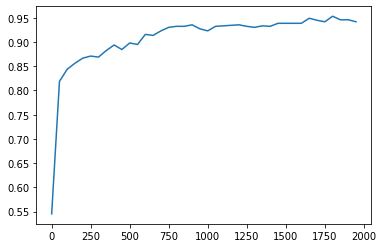

0 [0.40582726]
50 [0.68990635]
100 [0.75962539]
150 [0.78876171]
200 [0.79188345]
250 [0.78043704]
300 [0.83662851]
350 [0.85952133]
400 [0.87617066]
450 [0.89698231]
500 [0.90634755]
550 [0.92091571]
600 [0.92611863]
650 [0.93236212]
700 [0.93236212]
750 [0.93236212]
800 [0.93028096]
850 [0.93132154]
900 [0.92611863]
950 [0.93132154]
1000 [0.93756504]
1050 [0.93756504]
1100 [0.93860562]
1150 [0.93756504]
1200 [0.9396462]
1250 [0.93756504]
1300 [0.94276795]
1350 [0.94276795]
1400 [0.94276795]
1450 [0.94693028]
1500 [0.94380853]
1550 [0.9458897]
1600 [0.94276795]
1650 [0.9396462]
1700 [0.94276795]
1750 [0.94276795]
1800 [0.94276795]
1850 [0.94276795]
1900 [0.94484912]
1950 [0.9458897]
[[-0.66920104]
 [-0.34299547]
 [-0.25457367]
 [-0.15132869]
 [ 0.11047398]]


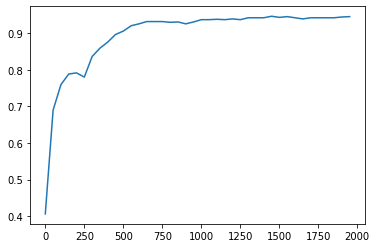

0 [0.63371488]
50 [0.77835588]
100 [0.75026015]
150 [0.75754422]
200 [0.78563996]
250 [0.79396462]
300 [0.81581686]
350 [0.86472425]
400 [0.88969823]
450 [0.89594173]
500 [0.90218522]
550 [0.90010406]
600 [0.89906348]
650 [0.91050989]
700 [0.90842872]
750 [0.90634755]
800 [0.9094693]
850 [0.91467222]
900 [0.92091571]
950 [0.92299688]
1000 [0.92507804]
1050 [0.92403746]
1100 [0.92924037]
1150 [0.93340271]
1200 [0.93548387]
1250 [0.93652445]
1300 [0.93548387]
1350 [0.93444329]
1400 [0.93652445]
1450 [0.9396462]
1500 [0.95005203]
1550 [0.95317378]
1600 [0.95525494]
1650 [0.95005203]
1700 [0.95733611]
1750 [0.95005203]
1800 [0.94901145]
1850 [0.94380853]
1900 [0.94693028]
1950 [0.94693028]
[[-0.67644789]
 [-0.31485712]
 [-0.27561306]
 [-0.15397762]
 [ 0.0988025 ]]


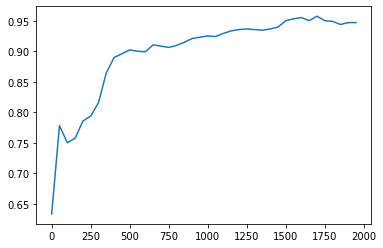

0 [0.61498439]
50 [0.68262227]
100 [0.74297607]
150 [0.75442248]
200 [0.80020812]
250 [0.81061394]
300 [0.86888658]
350 [0.87825182]
400 [0.86992716]
450 [0.8855359]
500 [0.88657648]
550 [0.89386056]
600 [0.91363163]
650 [0.92091571]
700 [0.94068678]
750 [0.93548387]
800 [0.93548387]
850 [0.9396462]
900 [0.94172737]
950 [0.9396462]
1000 [0.94693028]
1050 [0.95525494]
1100 [0.94901145]
1150 [0.9458897]
1200 [0.94484912]
1250 [0.94276795]
1300 [0.94484912]
1350 [0.9458897]
1400 [0.94484912]
1450 [0.94276795]
1500 [0.94484912]
1550 [0.94693028]
1600 [0.9458897]
1650 [0.94693028]
1700 [0.94797086]
1750 [0.94693028]
1800 [0.94693028]
1850 [0.94797086]
1900 [0.94797086]
1950 [0.94901145]
[[-0.66341197]
 [-0.31066018]
 [-0.29494338]
 [-0.1838685 ]
 [ 0.11658406]]


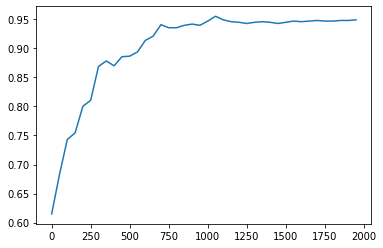

0 [0.80645161]
50 [0.67325702]
100 [0.72216441]
150 [0.77003122]
200 [0.78459938]
250 [0.84287201]
300 [0.8616025]
350 [0.87200832]
400 [0.88969823]
450 [0.8855359]
500 [0.89802289]
550 [0.89386056]
600 [0.90426639]
650 [0.91155047]
700 [0.92091571]
750 [0.91467222]
800 [0.9157128]
850 [0.91259105]
900 [0.93340271]
950 [0.93652445]
1000 [0.93444329]
1050 [0.93340271]
1100 [0.93652445]
1150 [0.9396462]
1200 [0.94172737]
1250 [0.94276795]
1300 [0.94276795]
1350 [0.94380853]
1400 [0.9458897]
1450 [0.94276795]
1500 [0.94276795]
1550 [0.94276795]
1600 [0.94276795]
1650 [0.94693028]
1700 [0.94901145]
1750 [0.94797086]
1800 [0.94484912]
1850 [0.94276795]
1900 [0.94276795]
1950 [0.94276795]
[[-0.67410492]
 [-0.33453303]
 [-0.2681051 ]
 [-0.14993487]
 [ 0.10231368]]


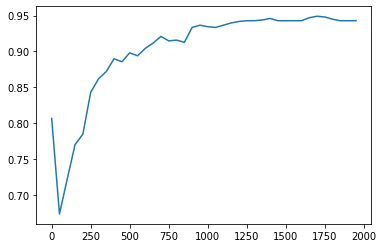

0 [0.68262227]
50 [0.75026015]
100 [0.77419355]
150 [0.8314256]
200 [0.83662851]
250 [0.84703434]
300 [0.83870968]
350 [0.87200832]
400 [0.88657648]
450 [0.87617066]
500 [0.89594173]
550 [0.91050989]
600 [0.9157128]
650 [0.92299688]
700 [0.9219563]
750 [0.92299688]
800 [0.92403746]
850 [0.93548387]
900 [0.93028096]
950 [0.93756504]
1000 [0.9396462]
1050 [0.93340271]
1100 [0.93860562]
1150 [0.94068678]
1200 [0.9396462]
1250 [0.94068678]
1300 [0.94068678]
1350 [0.94172737]
1400 [0.94068678]
1450 [0.94276795]
1500 [0.94068678]
1550 [0.94068678]
1600 [0.94276795]
1650 [0.94276795]
1700 [0.94276795]
1750 [0.94172737]
1800 [0.94172737]
1850 [0.94276795]
1900 [0.94276795]
1950 [0.9396462]
[[-0.6784493 ]
 [-0.34889499]
 [-0.25544072]
 [-0.16015527]
 [ 0.08189107]]


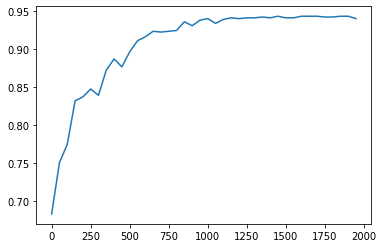

0 [0.65764828]
50 [0.70031217]
100 [0.73985432]
150 [0.79916753]
200 [0.82310094]
250 [0.87304891]
300 [0.86784599]
350 [0.86264308]
400 [0.86264308]
450 [0.86888658]
500 [0.86888658]
550 [0.8917794]
600 [0.88241415]
650 [0.89802289]
700 [0.92299688]
750 [0.93340271]
800 [0.93340271]
850 [0.93756504]
900 [0.93860562]
950 [0.9396462]
1000 [0.93860562]
1050 [0.94068678]
1100 [0.94172737]
1150 [0.94068678]
1200 [0.94068678]
1250 [0.9396462]
1300 [0.9396462]
1350 [0.94068678]
1400 [0.94172737]
1450 [0.94276795]
1500 [0.9396462]
1550 [0.94276795]
1600 [0.94276795]
1650 [0.94276795]
1700 [0.94276795]
1750 [0.94276795]
1800 [0.94276795]
1850 [0.94276795]
1900 [0.94276795]
1950 [0.94276795]
[[-0.69493023]
 [-0.32320338]
 [-0.27495712]
 [-0.13405162]
 [ 0.10009169]]


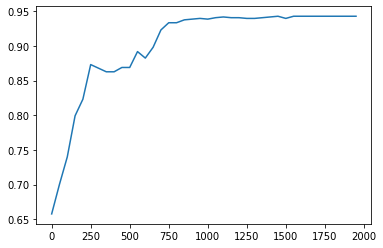

0 [0.61706556]
50 [0.68990635]
100 [0.7346514]
150 [0.72944849]
200 [0.75546306]
250 [0.78772112]
300 [0.82726327]
350 [0.8491155]
400 [0.88241415]
450 [0.90738814]
500 [0.9219563]
550 [0.91467222]
600 [0.91467222]
650 [0.92924037]
700 [0.92611863]
750 [0.91779396]
800 [0.92091571]
850 [0.92091571]
900 [0.92299688]
950 [0.92403746]
1000 [0.92299688]
1050 [0.92091571]
1100 [0.92091571]
1150 [0.93132154]
1200 [0.9396462]
1250 [0.9396462]
1300 [0.93340271]
1350 [0.93340271]
1400 [0.93340271]
1450 [0.9396462]
1500 [0.94276795]
1550 [0.94693028]
1600 [0.94276795]
1650 [0.94484912]
1700 [0.94693028]
1750 [0.94484912]
1800 [0.94797086]
1850 [0.94693028]
1900 [0.9458897]
1950 [0.94797086]
[[-0.65693174]
 [-0.3377266 ]
 [-0.27078883]
 [-0.164595  ]
 [ 0.1137395 ]]


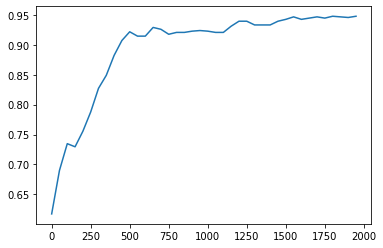

Training Stats

Accuracy =  0.8986420395421437
Precision =  0.9254414625135814
Recall =  0.9811676082862524
Loss =  273.8300108401887
Fscore =  0.9524719209498734
Test Stats : 

Accuracy =  0.9462287104622871
Precision =  0.9190105727270115
Recall =  0.9917748917748919
Loss =  120.81337628919212
Fscore =  0.9539981433674984


In [31]:
acc,prec,recall,loss,f=np.zeros((10,1)),np.zeros((10,1)),np.zeros((10,1)),np.zeros((10,1)),np.zeros((10,1))
acct,prect,recallt,losst,ft=np.zeros((10,1)),np.zeros((10,1)),np.zeros((10,1)),np.zeros((10,1)),np.zeros((10,1))
for s in range(10):
    train=dataset.sample(frac=0.7,random_state=100).astype('float') #random state is a seed value
    test=dataset.drop(train.index).iloc[1:].astype('float')

    w=np.zeros((5,1))
    #print(train)
    labels=train[4]
    labels_test=test[4]
       
    
    train=train.to_numpy()
    test=test.to_numpy()
    
    train=np.delete(train, -1, axis=1)
    test=np.delete(test, -1, axis=1)
    
    ones=np.ones((len(train),1))
    train=np.append(train,ones,1)
    
    ones=np.ones((len(test),1))
    test=np.append(test,ones,1)
    

    epochs=2000
    error=np.zeros((epochs,1))
    acc=np.zeros((epochs,1))
    
    for i in range(epochs):
        acc[i],w,error[i]=SGD(0.001,w,train,labels)
        if i%50==0:
            print(i,acc[i])
            
    print(w)           
    import matplotlib.pyplot as plt
    #x = np.linspace(0, 2000, len(error), endpoint=True)
    #plt.plot(x[::50],error[::50])  
    y = np.linspace(0, epochs, len(acc), endpoint=True)
    plt.plot(y[::50],acc[::50]) 
    plt.show()
    labels_test=labels_test.to_numpy()
    labels=labels.to_numpy()
    acc[s],prec[s],recall[s],loss[s],f[s]=stats("Training",labels,train,w)
    acct[s],prect[s],recallt[s],losst[s],ft[s]=stats("Testing",labels_test,test,w)

print("Training Stats\n")
print("Accuracy = ",np.mean(acc))
print("Precision = ",np.mean(prec))
print("Recall = ",np.mean(recall))
print("Loss = ",np.mean(loss))
print("Fscore = ",np.mean(f))

print("Test Stats : \n")
print("Accuracy = ",np.mean(acct))
print("Precision = ",np.mean(prect))
print("Recall = ",np.mean(recallt))
print("Loss = ",np.mean(losst))
print("Fscore = ",np.mean(ft))
    

In [32]:
train=dataset.iloc[1:].astype('float')
l=train[4]
train=train.to_numpy()
train=np.delete(train, -1, axis=1)
ones=np.ones((len(train),1))
train=np.append(train,ones,1)
w=np.zeros((5,1))
print(np.shape(train))
for i in range(1):
    acc,w=GD(0.0001,w,train,l)
#print(w) 
stats("Training ",l.to_numpy(),train,w)
stats("Testing ",)


(1372, 5)


ValueError: too many values to unpack (expected 2)